In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("Fraud_check.csv")

# EDA and data visualization

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data=data.drop("City.Population",axis=1)

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [7]:
data.shape

(600, 5)

In [8]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


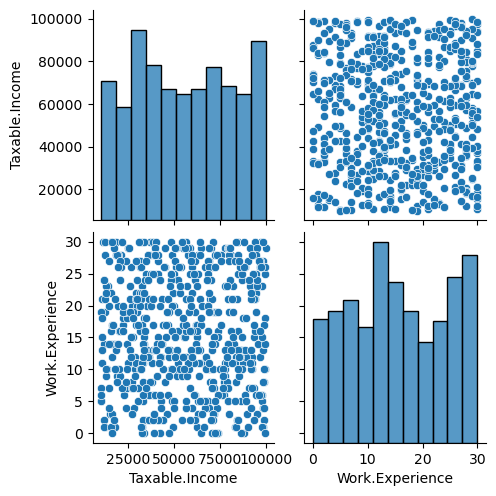

In [11]:
sns.pairplot(data)

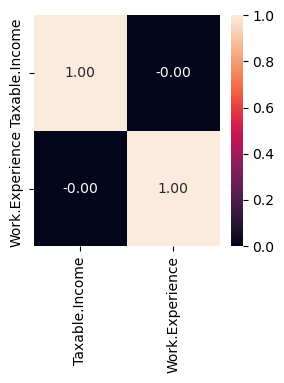

In [12]:
plt.figure(figsize=(3,3))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


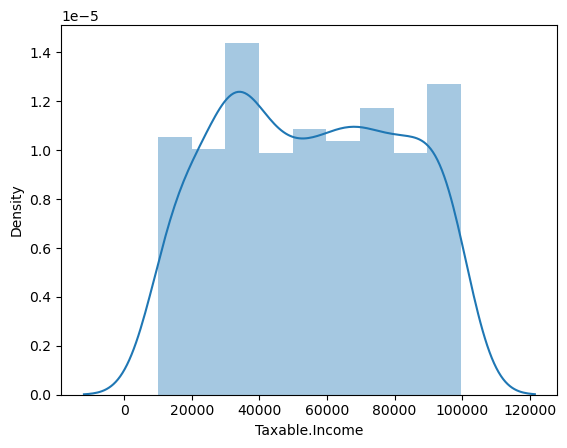

In [13]:
sns.distplot(data['Taxable.Income'])
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


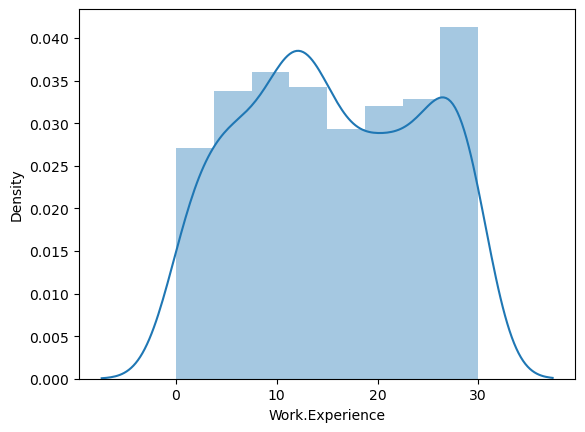

In [14]:
sns.distplot(data['Work.Experience'])
plt.show()

#### Label Encoding

In [15]:
label=LabelEncoder()
for i in data.columns:
    if(type(data[i][1])==str):
        data[i]=label.fit_transform(data[i])

In [16]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


In [17]:
data["Taxable.Income"]=np.where(data["Taxable.Income"]<=30000,0,1)

In [18]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,1,10,1
1,1,0,1,18,1
2,0,1,1,30,1
3,1,2,1,15,1
4,0,1,1,28,0


In [19]:
x=data.drop(["Taxable.Income"],axis="columns")
y=data["Taxable.Income"]

In [20]:
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

# model building

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [23]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (402, 4)
y_train:  (402,)
x_test:  (198, 4)
y_test:  (198,)


#### gini_model

In [24]:
gini_model=RandomForestClassifier(n_estimators=50,criterion="gini",random_state=1)
gini_model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50, random_state=1)

In [25]:
gini_pred=gini_model.predict(x_test)
print("classification_report\n",classification_report(gini_pred,y_test))

classification_report
               precision    recall  f1-score   support

           0       0.07      0.11      0.09        28
           1       0.84      0.78      0.81       170

    accuracy                           0.69       198
   macro avg       0.46      0.44      0.45       198
weighted avg       0.73      0.69      0.71       198



In [26]:
print("confusion_matrix\n",confusion_matrix(gini_pred,y_test))

confusion_matrix
 [[  3  25]
 [ 37 133]]


#### Entropy_model

In [27]:
entropy_model=RandomForestClassifier(n_estimators=50,criterion="entropy",random_state=1)
entropy_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [28]:
entropy_pred=entropy_model.predict(x_test)
print("classification_report\n",classification_report(entropy_pred,y_test))

classification_report
               precision    recall  f1-score   support

           0       0.07      0.11      0.09        27
           1       0.85      0.78      0.81       171

    accuracy                           0.69       198
   macro avg       0.46      0.45      0.45       198
weighted avg       0.74      0.69      0.72       198



In [29]:
print("confusion_matrix\n",confusion_matrix(entropy_pred,y_test))

confusion_matrix
 [[  3  24]
 [ 37 134]]


#### accuracy for using gini criteria is 69% and for entropy criteria is 69% 